# Introduction to PUMS Notebook

The U.S. Census website  contains numerous kinds of demographic  data about the United States.  In this section we focus on data collected in surveys conducted during the decennial  census, which is distinct from the more frequently collected American Community Survey data.  More especifically, we will  confine our attention to the [Census 2000 PUMS data](http://www2.census.gov/census_2000/datasets/PUMS/>). PUMS  stands for **Public Use Microdata Samples**.  It is called *Microdata* because the the records contain information about one person or one household.

The discussion below assumes you have visited the PUMS ages on the Census Bureau site and downloaded at least two files, `revisedpums1_alabama.txt` and the data dictionary available in the Excel workbooks, `5%_PUMS_record_layout.xls`.  For more details see the book draft chapter on data, especially the section on PUMS data.  You also need the Python module `read_in_census_data`, which can also be downloaded from a link in the PUMS data section of the book draft.

## Getting and Situating the data

This noitebook presents only solution for loading the census data, for code and data you have uploaded on google drive.  For the alternative code for using files on your local machine,
see the `importing_and_loading_files_in_colab`. notebook (intro module).

In this example we will assume you have placed the following three files in a folder named  `census` on your Google Drive.

1. [read_in_census_data.py](https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/read_in_census_data.py)
2. 5%_PUMS_record_layout.xls
3. [PUMS data for Alabam 1% 2010](https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/revisedpums1_alabama_01.txt)

This link to [pums_example.zip](https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/pums_example.zip) leads to a zipfile containing all three of these files.


## Reading in the data dictionary

First you need to import the `read_in_census_data` module and read in the data dictionary in
the Census web site Excel sheet.

**Attention!**:  This notebook as is will only work on google colab, and foer someone who has downloaded the data and code files onto a folder name "census" on their Google Drive.

In [ ]:
import importlib.util
import os.path
from google.colab import drive

# Mount google drive to create a filesystem the notebook can use
drive.mount('/content/gdrive') 
# Specify the code dir in the new filesystem.
code_dir ='/content/gdrive/My Drive/census/'

#from read_in_census_data import CensusInfo, DataFrameWrapper

filename = os.path.join(code_dir, 'read_in_census_data.py')
spec = importlib.util.spec_from_file_location("census", filename)
# Name for imported module will be census
census = importlib.util.module_from_spec(spec)
spec.loader.exec_module(census)
data_dir = code_dir
one_percent_data_file = os.path.join(data_dir,
                                     'revisedpums1_alabama_01.txt')
data_dictionary = os.path.join(data_dir,
                               '5%_PUMS_record_layout.xls')
ci = census.CensusInfo (data_dictionary)
df = census.DataFrameWrapper(ci)

Mounted at /content/gdrive
Processing 'Housing Unit Record' Sheet

Processing 'Person Record' Sheet



## Potential projects

Here are some ideas for potential projects using the PUMS data.

1) Compare income levels for a variety of levels of education state by state. This can be done
   by creating bins for education level as in the example above.  You may wish to explore different
   bins than the ones used in that example.  For this project you must do at least 10 states, and you must
   choose states that represent some variety in population and urbanization.  You will need to turn in the Python
   notebook, some prose and explaining and justifying what you did (2 pages), and you need to produce some graphs
   plotting education level (x axis) and income levels (y axis).  Make sure you can get the data for
   several states on one plot.  Use different colored lines.  Your intellectual goal is  to decide if differences in
   education level explain the differences in income state by state, or whether there are other major factors. An
   alternative visualization is to use maps like the maps we use for the campaign contribution to represent (state by state)
   percentages of residents with a particular level of education reaching a certain income level. 
   
2) Compare income levels for a variety of levels of education for whites and non-whites.  You can do this in
   several states, optionally but you must do at least one.  You will need to turn in the Python
   notebook, some prose and explaining and justifying what you did (2 pages), and you need to produce some graphs
   plotting education level (x axis) and income levels (y axis).  Make sure you can get the data for
   whites and non-whites on one plot.  Use different colored lines.  Your intellectual goal is  to decide if differences in
   education level explain the differences in income for whites and non whites, or whether there are other major factors.
   
   

In [ ]:
def income_level (x):
    
    if 0 < x < 20000:
        return 'poverty'
    elif x < 45000:
        return 'lower'
    elif x < 140000:
        return 'middle'
    elif x < 150000:
        return 'upper middle'
    elif x < 400000:
        return 'upper'
    else:
        return 'top 1 percent'

In [ ]:
def education (x):
    
    if 9 <= x <= 11:
        return 'HS'
    elif x == 12:
        return 'AA'
    elif x == 13:
        return 'BA'
    elif x == 14:
        return 'MA'
    elif x > 14:
        return 'HD'
    else:
        return 'ND'

In [ ]:
df = census.DataFrameWrapper(ci)
# we select a subset of the columns.
df.fill_frame ([], ci.person_record, one_percent_data_file, ci.one_percent_file, \
                'race','income','education')

In [ ]:
df.save_frame(os.path.join(data_dir,'final_project_pums_extract.csv'),header=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## Note default is to use header line to name cols.
## header argument is for selecting cols or renaming cols
## Specify dat types for all the codes that arent really intended to be treated as numbers
## Let pandas try to figure out income,education, and age.
dt_dict ={'serial_no':object,'race':object,'income':object, 'education':object}
p_df = pd.read_csv(os.path.join(data_dir,'final_project_pums_extract.csv'),
                   dtype=dt_dict)

In [ ]:
p_df

,serial_no,race,income,education
0,0000117,47,047300,12
1,0000117,47,024300,12
2,0000117,47,NaN,00
3,0000127,47,000000,05
4,0000127,47,022000,10
...,...,...,...,...
44482,0999820,37,NaN,01
44483,0999820,37,000000,07
44484,0999826,37,000000,08
44485,0999826,37,NaN,05


In [ ]:
p_df['white_only'] = p_df['race'].map(lambda x: x == '47')

In [ ]:
p_df=p_df.dropna(axis=0)

In [ ]:
p_df['income'] = p_df['income'].astype(int)
p_df['education'] = p_df['education'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
p_df['income_level'] = p_df['income'].map(income_level)
p_df['degrees'] = p_df['education'].map(education)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
p_df

,serial_no,race,income,education,white_only,income_level,degrees
0,0000117,47,47300,12,True,middle,AA
1,0000117,47,24300,12,True,lower,AA
3,0000127,47,0,5,True,lower,ND
4,0000127,47,22000,10,True,lower,HS
5,0000127,47,0,5,True,lower,ND
...,...,...,...,...,...,...,...
44479,0999753,47,0,10,True,lower,HS
44480,0999765,47,30000,9,True,lower,HS
44481,0999820,37,300,7,False,poverty,ND
44483,0999820,37,0,7,False,lower,ND


In [ ]:
p_df_white = p_df[p_df['white_only']==True]

In [ ]:
p_df_nonwhite = p_df[p_df['white_only']==False]

In [ ]:
xtab_w=pd.crosstab(p_df_white.degrees,p_df_white.income_level,margins=True)
xtab_w

income_level,lower,middle,poverty,upper,upper middle,All
degrees,,,,,,
AA,791,166,322,4,2,1285
BA,1575,758,458,41,8,2840
HD,218,131,51,52,2,454
HS,8092,1021,4032,28,1,13174
MA,635,282,151,17,4,1089
ND,5107,139,1692,11,0,6949
All,16418,2497,6706,153,17,25791


In [ ]:
xtab_nw=pd.crosstab(p_df_nonwhite.degrees,p_df_nonwhite.income_level,margins=True)
xtab_nw

income_level,lower,middle,poverty,upper,upper middle,All
degrees,,,,,,
AA,229,28,146,1,0,404
BA,339,90,123,2,1,555
HD,34,27,10,1,0,72
HS,2316,148,1893,7,2,4366
MA,144,46,42,1,0,233
ND,2728,35,988,6,0,3757
All,5790,374,3202,18,3,9387


In [ ]:
xtab_w_2= xtab_w.transpose()

In [ ]:
xtab_nw_2= xtab_nw.transpose()
xtab_nw_2

degrees,AA,BA,HD,HS,MA,ND,All
income_level,,,,,,,
lower,229,339,34,2316,144,2728,5790
middle,28,90,27,148,46,35,374
poverty,146,123,10,1893,42,988,3202
upper,1,2,1,7,1,6,18
upper middle,0,1,0,2,0,0,3
All,404,555,72,4366,233,3757,9387


In [ ]:
all_f = xtab_w_2['All'].map(lambda x: float(x))
xtab_w_2['AA'] = xtab_w_2['AA']/all_f
xtab_w_2['BA'] = xtab_w_2['BA']/all_f
xtab_w_2['HD'] = xtab_w_2['HD']/all_f
xtab_w_2['HS'] = xtab_w_2['HS']/all_f
xtab_w_2['MA'] = xtab_w_2['MA']/all_f
xtab_w_2['ND'] = xtab_w_2['ND']/all_f
xtab_w_2['All'] = xtab_w_2['All']/all_f
xtab_w_2

degrees,AA,BA,HD,HS,MA,ND,All
income_level,,,,,,,
lower,0.048179,0.095931,0.013278,0.492874,0.038677,0.311061,1.0
middle,0.066480,0.303564,0.052463,0.408891,0.112936,0.055667,1.0
poverty,0.048017,0.068297,0.007605,0.601253,0.022517,0.252311,1.0
upper,0.026144,0.267974,0.339869,0.183007,0.111111,0.071895,1.0
upper middle,0.117647,0.470588,0.117647,0.058824,0.235294,0.000000,1.0
All,0.049824,0.110116,0.017603,0.510798,0.042224,0.269435,1.0


In [ ]:
all_f = xtab_nw_2['All'].map(lambda x: float(x))
xtab_nw_2['AA'] = xtab_nw_2['AA']/all_f
xtab_nw_2['BA'] = xtab_nw_2['BA']/all_f
xtab_nw_2['HD'] = xtab_nw_2['HD']/all_f
xtab_nw_2['HS'] = xtab_nw_2['HS']/all_f
xtab_nw_2['MA'] = xtab_nw_2['MA']/all_f
xtab_nw_2['ND'] = xtab_nw_2['ND']/all_f
xtab_nw_2['All'] = xtab_nw_2['All']/all_f
xtab_nw_2

degrees,AA,BA,HD,HS,MA,ND,All
income_level,,,,,,,
lower,0.039551,0.058549,0.005872,0.400000,0.024870,0.471157,1.0
middle,0.074866,0.240642,0.072193,0.395722,0.122995,0.093583,1.0
poverty,0.045597,0.038413,0.003123,0.591193,0.013117,0.308557,1.0
upper,0.055556,0.111111,0.055556,0.388889,0.055556,0.333333,1.0
upper middle,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,1.0
All,0.043038,0.059124,0.007670,0.465111,0.024822,0.400234,1.0


In [ ]:
xtab_w_2 = xtab_w_2.drop(['All'], axis=0)
xtab_w_2 = xtab_w_2.drop(['All'], axis=1)

In [ ]:
xtab_nw_2 = xtab_nw_2.drop(['All'], axis=0)
xtab_nw_2 = xtab_nw_2.drop(['All'], axis=1)

JMG. You need to learn how to use variables and loops.  This is close to unreadable because it does the same thing over and over without telling you so.  It would be a good exercise to try and turn this into a loop.

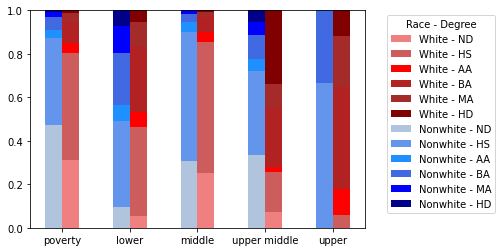

In [ ]:
white_bar_list = [plt.bar(['poverty','lower','middle','upper middle','upper'],xtab_w_2['ND'],color=('lightcoral'),align='edge', width= 0.25,label='White - ND'),
                  plt.bar(['poverty','lower','middle','upper middle','upper'],xtab_w_2['HS'],color=('indianred'),align='edge', width= 0.25,bottom=xtab_w_2['ND'],label='White - HS'),
                  plt.bar(['poverty','lower','middle','upper middle','upper'],xtab_w_2['AA'],color=('red'),align='edge', width= 0.25,bottom=xtab_w_2['ND']+xtab_w_2['HS'],label='White - AA'),
                  plt.bar(['poverty','lower','middle','upper middle','upper'],xtab_w_2['BA'],color=('firebrick'),align='edge', width= 0.25,bottom=xtab_w_2['HS']+xtab_w_2['ND']+xtab_w_2['AA'],label='White - BA'),
                  plt.bar(['poverty','lower','middle','upper middle','upper'],xtab_w_2['MA'],color=('brown'),align='edge', width= 0.25,bottom=xtab_w_2['ND']+xtab_w_2['HS']+xtab_w_2['BA']+xtab_w_2['AA'],label='White - MA'),
                  plt.bar(['poverty','lower','middle','upper middle','upper'],xtab_w_2['HD'],color=('maroon'),align='edge', width= 0.25,bottom=xtab_w_2['MA']+xtab_w_2['ND']+xtab_w_2['HS']+xtab_w_2['BA']+xtab_w_2['AA'],label='White - HD')]

nonwhite_bar_list = [plt.bar(['poverty','lower','middle','upper middle','upper'],xtab_nw_2['ND'],color=('lightsteelblue'),align='edge', width= -0.25,label='Nonwhite - ND'),
                  plt.bar(['poverty','lower','middle','upper middle','upper'],xtab_nw_2['HS'],color=('cornflowerblue'),align='edge', width= -0.25,bottom=xtab_nw_2['ND'],label='Nonwhite - HS'),
                  plt.bar(['poverty','lower','middle','upper middle','upper'],xtab_nw_2['AA'],color=('dodgerblue'),align='edge', width= -0.25,bottom=xtab_nw_2['ND']+xtab_nw_2['HS'],label='Nonwhite - AA'),
                  plt.bar(['poverty','lower','middle','upper middle','upper'],xtab_nw_2['BA'],color=('royalblue'),align='edge', width= -0.25,bottom=xtab_nw_2['HS']+xtab_nw_2['ND']+xtab_nw_2['AA'],label='Nonwhite - BA'),
                  plt.bar(['poverty','lower','middle','upper middle','upper'],xtab_nw_2['MA'],color=('blue'),align='edge', width= -0.25,bottom=xtab_nw_2['ND']+xtab_nw_2['HS']+xtab_nw_2['BA']+xtab_nw_2['AA'],label='Nonwhite - MA'),
                  plt.bar(['poverty','lower','middle','upper middle','upper'],xtab_nw_2['HD'],color=('darkblue'),align='edge', width= -0.25,bottom=xtab_nw_2['MA']+xtab_nw_2['ND']+xtab_nw_2['HS']+xtab_nw_2['BA']+xtab_nw_2['AA'],label='Nonwhite - HD')]

plt.legend(handles=[white_bar_list[0], white_bar_list[1],white_bar_list[2],white_bar_list[3],white_bar_list[4],white_bar_list[5],
                    nonwhite_bar_list[0],nonwhite_bar_list[1],nonwhite_bar_list[2],nonwhite_bar_list[3],nonwhite_bar_list[4],nonwhite_bar_list[5]], title='Race - Degree', bbox_to_anchor=(1.05, 1), loc='upper left')

JMG Good plot, nice choices of colors.

Some thought put into how to tell the story.



In [ ]:
xtab_w_t=pd.crosstab(p_df_white.degrees,p_df_white.income_level,margins=True)
xtab_nw_t=pd.crosstab(p_df_nonwhite.degrees,p_df_nonwhite.income_level,margins=True)


In [ ]:
all_f = xtab_w_t['All'].map(lambda x: float(x))
xtab_w_t['poverty'] = xtab_w_t['poverty']/all_f
xtab_w_t['lower'] = xtab_w_t['lower']/all_f
xtab_w_t['middle'] = xtab_w_t['middle']/all_f
xtab_w_t['upper middle'] = xtab_w_t['upper middle']/all_f
xtab_w_t['upper'] = xtab_w_t['upper']/all_f
xtab_w_t['All'] = xtab_w_t['All']/all_f
xtab_w_t

income_level,lower,middle,poverty,upper,upper middle,All
degrees,,,,,,
AA,0.615564,0.129183,0.250584,0.003113,0.001556,1.0
BA,0.554577,0.266901,0.161268,0.014437,0.002817,1.0
HD,0.480176,0.288546,0.112335,0.114537,0.004405,1.0
HS,0.614240,0.077501,0.306057,0.002125,0.000076,1.0
MA,0.583104,0.258953,0.138659,0.015611,0.003673,1.0
ND,0.734926,0.020003,0.243488,0.001583,0.000000,1.0
All,0.636579,0.096817,0.260013,0.005932,0.000659,1.0


In [ ]:
all_f = xtab_nw_t['All'].map(lambda x: float(x))
xtab_nw_t['poverty'] = xtab_nw_t['poverty']/all_f
xtab_nw_t['lower'] = xtab_nw_t['lower']/all_f
xtab_nw_t['middle'] = xtab_nw_t['middle']/all_f
xtab_nw_t['upper middle'] = xtab_nw_t['upper middle']/all_f
xtab_nw_t['upper'] = xtab_nw_t['upper']/all_f
xtab_nw_t['All'] = xtab_nw_t['All']/all_f
xtab_w_t

income_level,lower,middle,poverty,upper,upper middle,All
degrees,,,,,,
AA,0.615564,0.129183,0.250584,0.003113,0.001556,1.0
BA,0.554577,0.266901,0.161268,0.014437,0.002817,1.0
HD,0.480176,0.288546,0.112335,0.114537,0.004405,1.0
HS,0.614240,0.077501,0.306057,0.002125,0.000076,1.0
MA,0.583104,0.258953,0.138659,0.015611,0.003673,1.0
ND,0.734926,0.020003,0.243488,0.001583,0.000000,1.0
All,0.636579,0.096817,0.260013,0.005932,0.000659,1.0


In [ ]:
xtab_w_t = xtab_w_t.drop(['All'], axis=0)
xtab_w_t = xtab_w_t.drop(['All'], axis=1)

In [ ]:
xtab_nw_t = xtab_nw_t.drop(['All'], axis=0)
xtab_nw_t = xtab_nw_t.drop(['All'], axis=1)

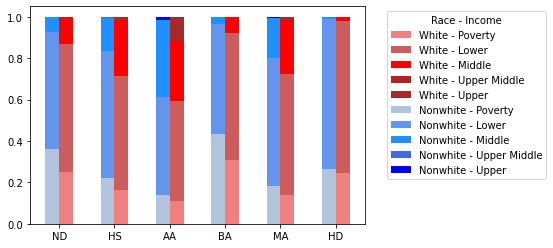

In [ ]:
white_bar_list_t = [plt.bar(['ND','HS','AA','BA','MA','HD'],xtab_w_t['poverty'],color=('lightcoral'),align='edge', width= 0.25,label='White - Poverty'),
                  plt.bar(['ND','HS','AA','BA','MA','HD'],xtab_w_t['lower'],color=('indianred'),align='edge', width= 0.25,bottom=xtab_w_t['poverty'],label='White - Lower'),
                  plt.bar(['ND','HS','AA','BA','MA','HD'],xtab_w_t['middle'],color=('red'),align='edge', width= 0.25,bottom=xtab_w_t['poverty']+xtab_w_t['lower'],label='White - Middle'),
                  plt.bar(['ND','HS','AA','BA','MA','HD'],xtab_w_t['upper middle'],color=('firebrick'),align='edge', width= 0.25,bottom=xtab_w_t['poverty']+xtab_w_t['lower']+xtab_w_t['middle'],label='White - Upper Middle'),
                  plt.bar(['ND','HS','AA','BA','MA','HD'],xtab_w_t['upper'],color=('brown'),align='edge', width= 0.25,bottom=xtab_w_t['poverty']+xtab_w_t['lower']+xtab_w_t['middle']+xtab_w_t['upper middle'],label='White - Upper'),
                  ]

nonwhite_bar_list_t = [plt.bar(['ND','HS','AA','BA','MA','HD'],xtab_nw_t['poverty'],color=('lightsteelblue'),align='edge', width= -0.25,label='Nonwhite - Poverty'),
                  plt.bar(['ND','HS','AA','BA','MA','HD'],xtab_nw_t['lower'],color=('cornflowerblue'),align='edge', width= -0.25,bottom=xtab_nw_t['poverty'],label='Nonwhite - Lower'),
                  plt.bar(['ND','HS','AA','BA','MA','HD'],xtab_nw_t['middle'],color=('dodgerblue'),align='edge', width= -0.25,bottom=xtab_nw_t['poverty']+xtab_nw_t['lower'],label='Nonwhite - Middle'),
                  plt.bar(['ND','HS','AA','BA','MA','HD'],xtab_nw_t['upper middle'],color=('royalblue'),align='edge', width= -0.25,bottom=xtab_nw_t['poverty']+xtab_nw_t['lower']+xtab_nw_t['middle'],label='Nonwhite - Upper Middle'),
                  plt.bar(['ND','HS','AA','BA','MA','HD'],xtab_nw_t['upper'],color=('blue'),align='edge', width= -0.25,bottom=xtab_nw_t['poverty']+xtab_nw_t['lower']+xtab_nw_t['middle']+xtab_nw_t['upper middle'],label='Nonwhite - Upper'),
                  ]

plt.legend(handles=[white_bar_list_t[0], white_bar_list_t[1],white_bar_list_t[2],white_bar_list_t[3],white_bar_list_t[4],
                    nonwhite_bar_list_t[0],nonwhite_bar_list_t[1],nonwhite_bar_list_t[2],nonwhite_bar_list_t[3],nonwhite_bar_list_t[4]], title='Race - Income', bbox_to_anchor=(1.05, 1), loc='upper left')